In [1]:
# Feature Selection

In [2]:
# %qtconsole

In [3]:
# imports
import pickle as pkl
from joblib import load
from sklearn.feature_selection import chi2
#
from modulePreProcessing import TransformationMethods, FeatureMethods
from moduleUtilities import UtilityMethods

In [4]:
# class instances
fm = FeatureMethods()
ut = UtilityMethods()

In [5]:
# Load dataframes from EDA_PreProcessing
with open('dataframes/df_nrm.joblib', 'rb') as f: df_nrm = load(f)
with open('dataframes/df_std.joblib', 'rb') as f: df_std = load(f)

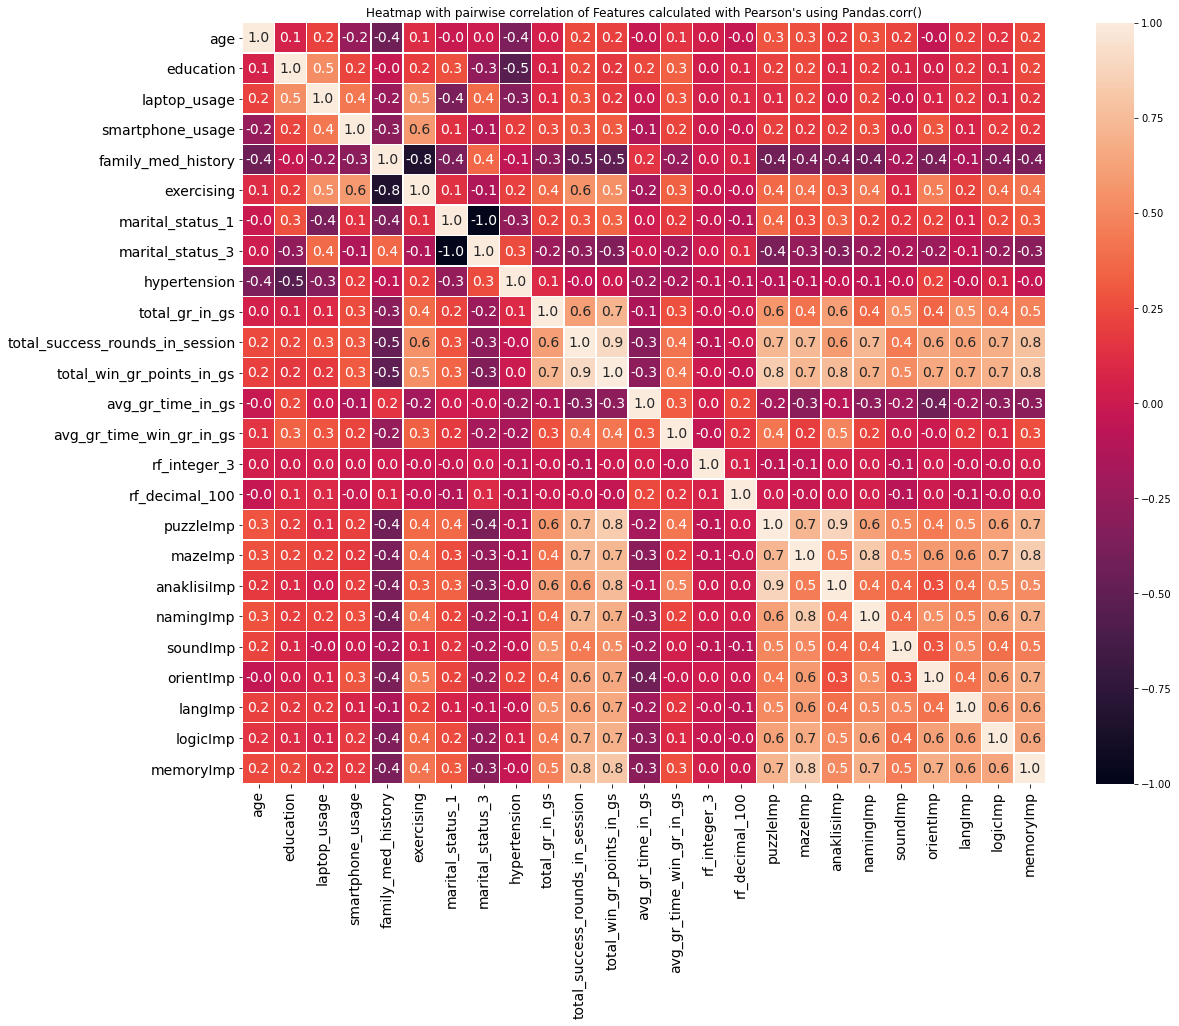

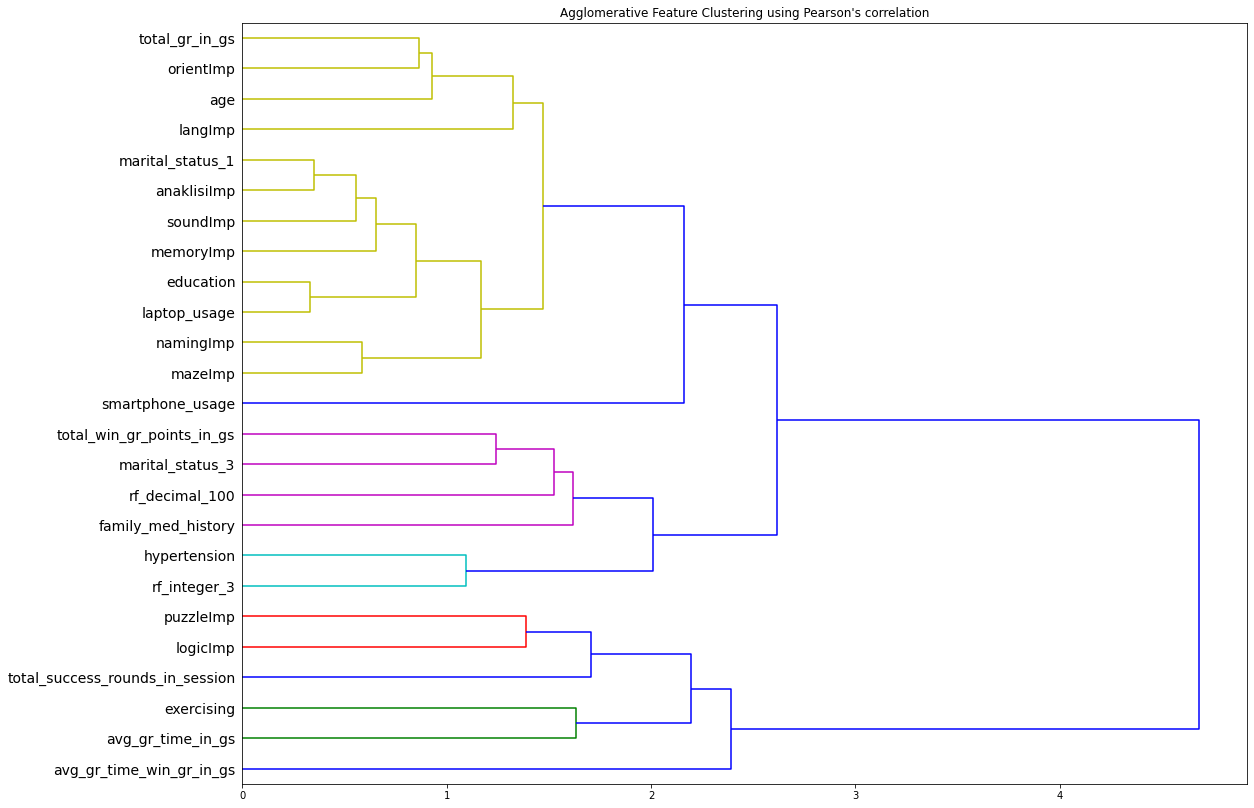

In [6]:
# Feature correlation inspection.
# We want to select features highly correlated to the target class and not correlated between them.
percentage_of_max_distance = 0.36 # for 0.38 I get 5 clusters + 3 uncorrelated
dictionary_of_clusters = fm.correlation_inspection(df_std, ut.fs['all'], percentage_of_max_distance)

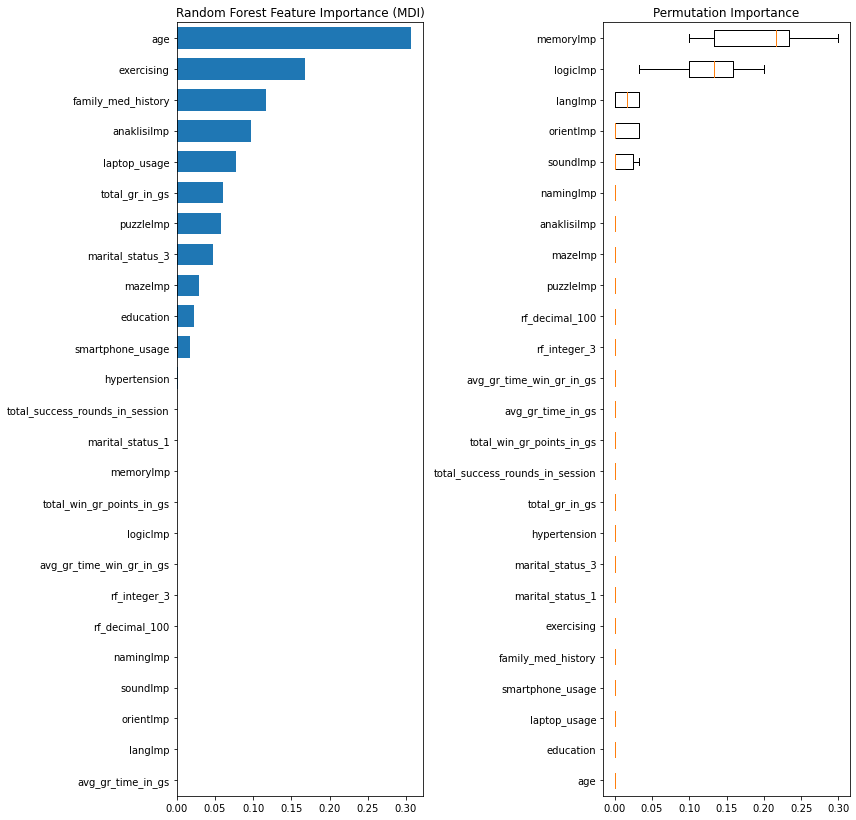

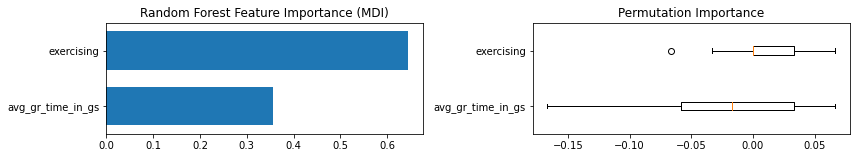

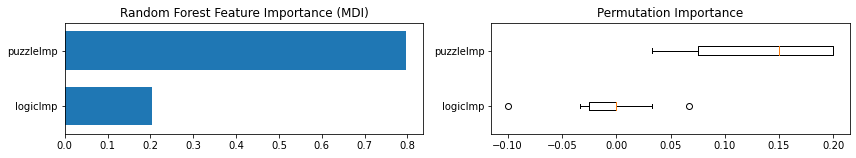

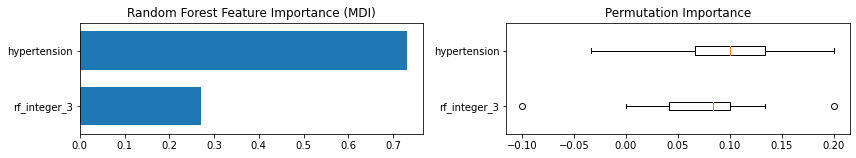

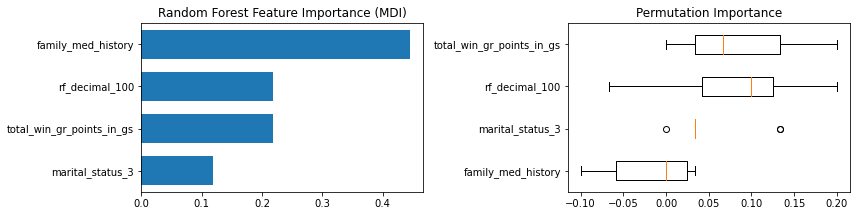

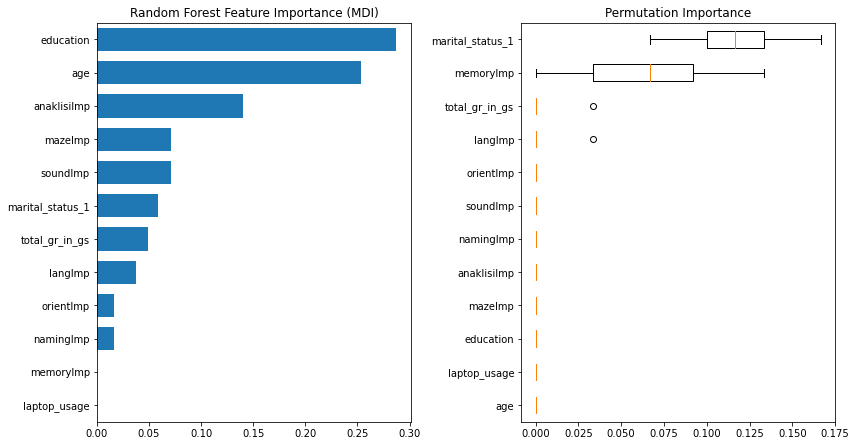

In [7]:
# feature importance inspection using a classifier
# Mean Decrease in Impurity (MDI) feature importance
# Permutation importance of feature values

fm.inspection_using_mdi_mda(df_std, ut.fs['all'])
for key in dictionary_of_clusters:
    if len(dictionary_of_clusters[key])>1:
        fm.inspection_using_mdi_mda(df_std, dictionary_of_clusters[key])

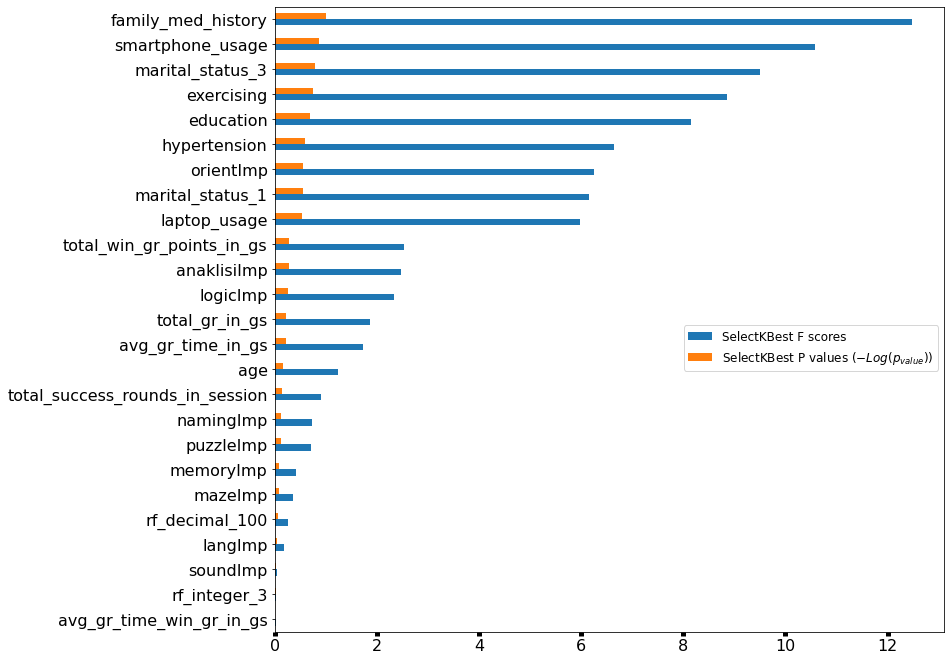

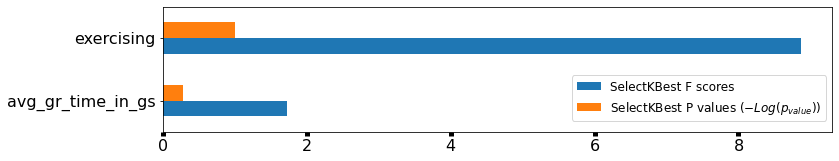

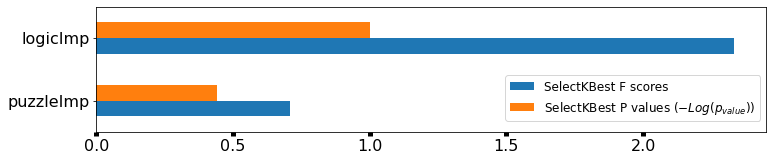

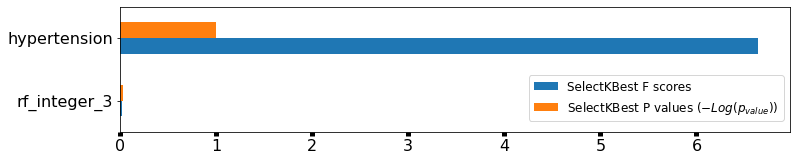

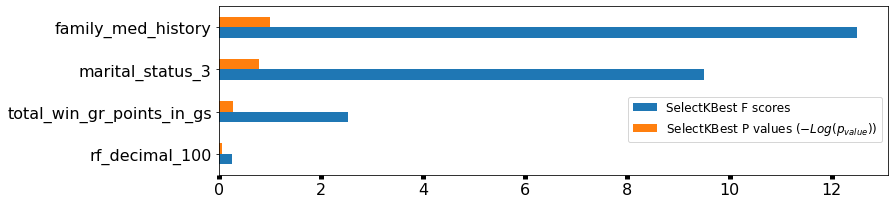

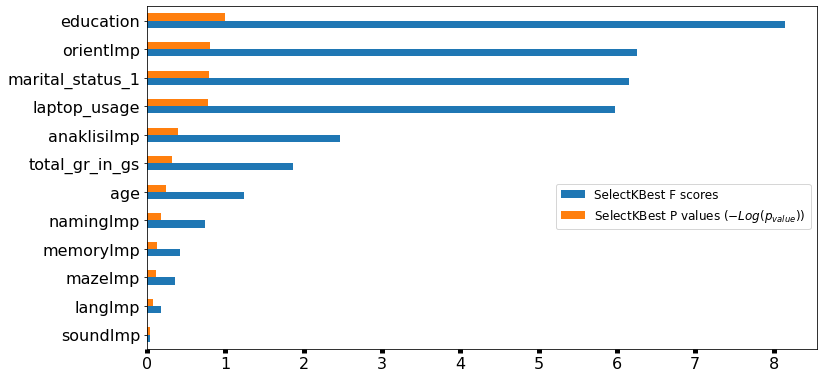

In [8]:
# Feature importance inspection using Univariate Feature Selection
# SelectKBest is a wrapper. The default scorer algorithm is f_classif (ANOVA F-value between label/feature) {chi2, f_classif}
# The smaller the p value the more significant the feature is, so we reverse its result for the plot

num_of_ideal_features_to_select = 12

selected_kbest = fm.inspection_using_select_k_best(df_nrm, ut.fs['all'], num_of_ideal_features_to_select, chi2)

for key in dictionary_of_clusters:
    if len(dictionary_of_clusters[key])>1:
        fm.inspection_using_select_k_best(df_nrm, dictionary_of_clusters[key], 'all', chi2)

In [9]:
print('selected_kbest:', selected_kbest)

selected_kbest: ['education', 'laptop_usage', 'smartphone_usage', 'family_med_history', 'exercising', 'marital_status_1', 'marital_status_3', 'hypertension', 'total_win_gr_points_in_gs', 'anaklisiImp', 'orientImp', 'logicImp']
